# Unintentional Non-Fatal Childhood Agricultural Injuries Presenting to United States Emergency Departments, 2000 to 2017

## Author: Ebuwa Evbuoma-Fike

## Last Edited: 07/18/2022, in progress!

## Project Information: https://github.com/ebuwaevbuoma-fike/childhood-agricultural-injury-project

# Installation Procedures

In [261]:
#Install required packages
!pip install pandas numpy scikit_learn seaborn matplotlib pingouin

In [262]:
#Import python packages
import pingouin
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14) #set plot font size
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns #set color schemes
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## DATA WRANGLING

### Import datasets

In [12]:
#Import datasets, 2000 to 2017
neiss2000 = pd.read_stata("neiss2000.dta")
neiss2001 = pd.read_stata("neiss2001.dta")
neiss2002 = pd.read_stata("neiss2002.dta")
neiss2003 = pd.read_stata("neiss2003.dta")
neiss2004 = pd.read_stata("neiss2004.dta")
neiss2005 = pd.read_stata("neiss2005.dta")
neiss2006 = pd.read_stata("neiss2006.dta")
neiss2007 = pd.read_stata("neiss2007.dta")
neiss2008 = pd.read_stata("neiss2008.dta")
neiss2009 = pd.read_stata("neiss2009.dta")
neiss2010 = pd.read_stata("neiss2010.dta")
neiss2011 = pd.read_stata("neiss2011.dta")
neiss2012 = pd.read_stata("neiss2012.dta")
neiss2013 = pd.read_stata("neiss2013.dta")
neiss2014 = pd.read_stata("neiss2014.dta")
neiss2015 = pd.read_stata("neiss2015.dta")
neiss2016 = pd.read_stata("neiss2016.dta")
neiss2017 = pd.read_stata("neiss2017.dta")


In [117]:
neiss2002 = pd.read_stata("neiss2002.dta")

In [116]:
del neiss2002

### Inspect and subset datasets

#### NEISS 2000 data

In [15]:
list(neiss2000)
neiss2000.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,...,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,706671,119.826698,63,LOWER TRUNK,STRAIN/SPRAIN,TREATED/RELEASED,FEMALE,MED,41 YRS,NON-HISP/NS,...,40-44,35-44,LOWER TRUNK,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,OVEREXERTION,239.653305
1,706672,119.826698,63,UPPER TRUNK,STRAIN/SPRAIN,TREATED/RELEASED,MALE,MED,72 YRS,NON-HISP/NS,...,70-74,65-74,UPPER TRUNK,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,OVEREXERTION,239.653305
2,706673,119.826698,63,ANKLE,STRAIN/SPRAIN,TREATED/RELEASED,FEMALE,MED,75 YRS,NON-HISP/NS,...,75-79,75-84,LEG/FOOT,INJURY DX,OTHER PROPERTY,WHITE,WHITE NH,UNINT/UNK,OVEREXERTION,239.653305
3,706674,119.826698,63,FACE,PUNCTURE,TREATED/RELEASED,FEMALE,MED,17 YRS,NON-HISP/NS,...,15-19,15-19,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,OTH BITE/STING,239.653305
4,706675,119.826698,63,FACE,CONTUSN ABR,TREATED/RELEASED,FEMALE,MED,77 YRS,NON-HISP/NS,...,75-79,75-84,HEAD/NECK,INJURY DX,HOME/APT/MOBILE,WHITE,WHITE NH,UNINT/UNK,FALL,239.653305


In [70]:
neiss2000.dtypes

nek            int32
weight       float32
psu            int32
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float32
dtype: object

In [17]:
print(neiss2000.shape)

(231672, 22)


In [271]:
#Relabel variable categories

neiss2000["bdypt"] = neiss2000["bdypt"].apply(str.lower)
neiss2000["diag"]  = neiss2000["diag"].apply(str.lower)
neiss2000["disp"]  = neiss2000["disp"].apply(str.lower)
neiss2000["sex"]   = neiss2000["sex"].apply(str.lower)
neiss2000["stratum"] = neiss2000["stratum"].apply(str.lower)
neiss2000["hisp_c"] = neiss2000["hisp_c"].apply(str.lower)
neiss2000["bdyptg_c"] = neiss2000["bdyptg_c"].apply(str.lower)
neiss2000["injury_c"] = neiss2000["injury_c"].apply(str.lower)
neiss2000["locg_c"] = neiss2000["locg_c"].apply(str.lower)
neiss2000["race2_c"] = neiss2000["race2_c"].apply(str.lower)
neiss2000["raceth_c"] = neiss2000["raceth_c"].apply(str.lower)
neiss2000["violen_c"] = neiss2000["violen_c"].apply(str.lower)
neiss2000["pcause_c"] = neiss2000["pcause_c"].apply(str.lower)
neiss2000["trmon_c"] = neiss2000["trmon_c"].apply(str.lower)
neiss2000.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,...,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 YRS,non-hisp/ns,...,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000
1,706672,119.826698,63,upper trunk,strain/sprain,treated/released,male,med,72 YRS,non-hisp/ns,...,65-74,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000
2,706673,119.826698,63,ankle,strain/sprain,treated/released,female,med,75 YRS,non-hisp/ns,...,75-84,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000
3,706674,119.826698,63,face,puncture,treated/released,female,med,17 YRS,non-hisp/ns,...,15-19,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,oth bite/sting,239.653305,2000
4,706675,119.826698,63,face,contusn abr,treated/released,female,med,77 YRS,non-hisp/ns,...,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,239.653305,2000


In [94]:
#Append a year column
neiss2000["year"] = 2000
neiss2000.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,...,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,706671,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 YRS,non-hisp/ns,...,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000
1,706672,119.826698,63,upper trunk,strain/sprain,treated/released,male,med,72 YRS,non-hisp/ns,...,65-74,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000
2,706673,119.826698,63,ankle,strain/sprain,treated/released,female,med,75 YRS,non-hisp/ns,...,75-84,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000
3,706674,119.826698,63,face,puncture,treated/released,female,med,17 YRS,non-hisp/ns,...,15-19,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,oth bite/sting,239.653305,2000
4,706675,119.826698,63,face,contusn abr,treated/released,female,med,77 YRS,non-hisp/ns,...,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,239.653305,2000


#### NEISS 2001 data

In [16]:
neiss2001.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,...,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta
0,80112477,63,154.733516,Lower leg,Laceration,Treated/released,Female,Med,67 Yrs,Non-Hisp/Ns,...,65-69,65-74,Leg/foot,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Struck by/ag,154.733516
1,80112478,63,154.733516,Head,Laceration,Treated/released,Male,Med,23 Yrs,Non-Hisp/Ns,...,20-24,20-24,Head/neck,Injury DX,Street,White,White Nh,Unint/UNK,MV-occupant,154.733516
2,80112479,63,154.733516,Lower trunk,Fracture,Hospitalized,Male,Med,79 Yrs,Non-Hisp/Ns,...,75-79,75-84,Lower trunk,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,UNK/unspec,154.733516
3,80112480,63,154.733516,All parts body,Poisoning,Transfd/released,Female,Med,42 Yrs,Non-Hisp/Ns,...,40-44,35-44,Other,Injury DX,UNK,NS,UNK,Unint/UNK,Poisoning,154.733516
4,80112481,63,154.733516,Shoulder,Fracture,Treated/released,Male,Med,4 Yrs,Non-Hisp/Ns,...,00-04,00-04,Upper trunk,Injury DX,Home/apt/mobile,White,White Nh,Unint/UNK,Fall,154.733516


In [86]:
neiss2001.dtypes

nek          float32
weight       float32
psu             int8
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float32
dtype: object

In [18]:
print(neiss2001.shape)

(479703, 22)


In [131]:
#Create function to apply lowercase to variable categories and ensure categories are string type
def dataframe_case_change(df, categories, lCase = True):
    if lCase:
        for category in categories:
            try:
                df[category] = df[category].apply(str.lower)
            except:
                print("Category issue for " + category)
                df[category] = df[category].astype("string")
                df[category] = df[category].apply(str.lower)
    else:
        for category in categories:
            try:
                df[category] = df[category].apply(str.upper)
            except:
                pass
    return df

In [296]:
#Create a list of variables of interest
category_list = ["bdypt","diag","disp", "sex", "stratum","hisp_c", "bdyptg_c","injury_c","locg_c", "race2_c",
               "raceth_c","violen_c", "pcause_c", "trmon_c"]

In [297]:
#Test the function
updated_frame = dataframe_case_change(neiss2001, category_list)
pd.options.display.max_columns = 28 #Display up to 28 columns
updated_frame.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,10115079.0,120.11882,63,wrist,strain/sprain,treated/released,male,med,21 YRS,non-hisp/ns,january,21,20-24,20-24,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001
1,10115080.0,120.11882,63,foot,strain/sprain,treated/released,male,med,72 YRS,non-hisp/ns,january,72,70-74,65-74,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,120.11882,2001
2,10115081.0,120.11882,63,lower trunk,strain/sprain,treated/released,male,med,30 YRS,non-hisp/ns,january,30,30-34,25-34,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,120.11882,2001
3,10115082.0,120.11882,63,head,fracture,hospitalized,female,med,82 YRS,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001
4,10115084.0,120.11882,63,face,laceration,treated/released,male,med,43 YRS,non-hisp/ns,january,43,40-44,35-44,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001


In [298]:
#Relabel neiss2001 dataset
neiss2001 = dataframe_case_change(neiss2001, category_list)
#Inspect
neiss2001.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,10115079.0,120.11882,63,wrist,strain/sprain,treated/released,male,med,21 YRS,non-hisp/ns,january,21,20-24,20-24,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001
1,10115080.0,120.11882,63,foot,strain/sprain,treated/released,male,med,72 YRS,non-hisp/ns,january,72,70-74,65-74,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,120.11882,2001
2,10115081.0,120.11882,63,lower trunk,strain/sprain,treated/released,male,med,30 YRS,non-hisp/ns,january,30,30-34,25-34,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,120.11882,2001
3,10115082.0,120.11882,63,head,fracture,hospitalized,female,med,82 YRS,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001
4,10115084.0,120.11882,63,face,laceration,treated/released,male,med,43 YRS,non-hisp/ns,january,43,40-44,35-44,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001


In [294]:
#Append a year column
neiss2001["year"] = 2001
neiss2001.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,10115079.0,120.11882,63,wrist,strain/sprain,treated/released,male,med,21 YRS,non-hisp/ns,january,21,20-24,20-24,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001
1,10115080.0,120.11882,63,foot,strain/sprain,treated/released,male,med,72 YRS,non-hisp/ns,january,72,70-74,65-74,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,120.11882,2001
2,10115081.0,120.11882,63,lower trunk,strain/sprain,treated/released,male,med,30 YRS,non-hisp/ns,january,30,30-34,25-34,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,120.11882,2001
3,10115082.0,120.11882,63,head,fracture,hospitalized,female,med,82 YRS,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001
4,10115084.0,120.11882,63,face,laceration,treated/released,male,med,43 YRS,non-hisp/ns,january,43,40-44,35-44,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,120.11882,2001


In [299]:
#Relabel variable categories for all years, 2001 to 2017

dataset_list = [neiss2001, neiss2002, neiss2003, neiss2004, neiss2005, neiss2006, neiss2007, neiss2008, neiss2009,
               neiss2010, neiss2011, neiss2012, neiss2013, neiss2014, neiss2015, neiss2016, neiss2017]


In [300]:
#Run a for loop to change case for each variable category

for df in dataset_list:
    df = dataframe_case_change(df, category_list)

#### NEISS 2002 data

In [301]:
neiss2002.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,20108156.0,119.634796,63,face,contusn abr,treated/released,female,med,2 YRS,non-hisp/ns,january,2,00-04,00-04,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,119.634796,2002
1,20108156.0,119.634796,63,lower arm,contusn abr,treated/released,male,med,38 YRS,non-hisp/ns,january,38,35-39,35-44,arm/hand,injury dx,street,white,white nh,unint/unk,fall,119.634796,2002
2,20108158.0,119.634796,63,head,internal inj,treated/released,male,med,86 YRS,non-hisp/ns,january,86,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,119.634796,2002
3,20108160.0,119.634796,63,finger,avulsion,treated/released,male,med,25 YRS,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,119.634796,2002
4,20108160.0,119.634796,63,knee,strain/sprain,treated/released,female,med,41 YRS,non-hisp/ns,january,41,40-44,35-44,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,119.634796,2002


In [302]:
neiss2002.dtypes


nek          float32
weight       float32
psu             int8
bdypt       category
diag        category
disp          object
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float32
year           int64
dtype: object

In [304]:
print(neiss2002.shape)

(488821, 23)


In [303]:
#Append a year column
neiss2002["year"] = 2002
neiss2002.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,20108156.0,119.634796,63,face,contusn abr,treated/released,female,med,2 YRS,non-hisp/ns,january,2,00-04,00-04,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,119.634796,2002
1,20108156.0,119.634796,63,lower arm,contusn abr,treated/released,male,med,38 YRS,non-hisp/ns,january,38,35-39,35-44,arm/hand,injury dx,street,white,white nh,unint/unk,fall,119.634796,2002
2,20108158.0,119.634796,63,head,internal inj,treated/released,male,med,86 YRS,non-hisp/ns,january,86,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,119.634796,2002
3,20108160.0,119.634796,63,finger,avulsion,treated/released,male,med,25 YRS,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,119.634796,2002
4,20108160.0,119.634796,63,knee,strain/sprain,treated/released,female,med,41 YRS,non-hisp/ns,january,41,40-44,35-44,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,119.634796,2002


#### NEISS 2003 data

In [305]:
neiss2003.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,30110838.0,140.084641,63,head,internal inj,treated/released,male,med,80 YRS,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641,2003
1,30110840.0,140.084641,63,foot,contusn abr,treated/released,male,med,8 YRS,non-hisp/ns,january,8,05-09,05-09,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,140.084641,2003
2,30110840.0,140.084641,63,finger,laceration,treated/released,male,med,25 YRS,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,140.084641,2003
3,30110840.0,140.084641,63,head,laceration,treated/released,female,med,89 YRS,non-hisp/ns,january,89,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641,2003
4,30110844.0,140.084641,63,head,internal inj,treated/released,male,med,16 YRS,non-hisp/ns,january,16,15-19,15-19,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641,2003


In [306]:
neiss2003.dtypes

nek          float32
weight       float32
psu             int8
bdypt       category
diag        category
disp          object
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float32
year           int64
dtype: object

In [307]:
print(neiss2003.shape)

(467031, 23)


In [308]:
#Append a year column
neiss2003["year"] = 2003
neiss2003.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,30110838.0,140.084641,63,head,internal inj,treated/released,male,med,80 YRS,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641,2003
1,30110840.0,140.084641,63,foot,contusn abr,treated/released,male,med,8 YRS,non-hisp/ns,january,8,05-09,05-09,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,140.084641,2003
2,30110840.0,140.084641,63,finger,laceration,treated/released,male,med,25 YRS,non-hisp/ns,january,25,25-29,25-34,arm/hand,injury dx,other property,white,white nh,unint/unk,cut/pierce,140.084641,2003
3,30110840.0,140.084641,63,head,laceration,treated/released,female,med,89 YRS,non-hisp/ns,january,89,85+,85+,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,140.084641,2003
4,30110844.0,140.084641,63,head,internal inj,treated/released,male,med,16 YRS,non-hisp/ns,january,16,15-19,15-19,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,140.084641,2003


#### NEISS 2004 data

In [309]:
neiss2004.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,40109108,63,143.481888,eyeball,contusn abr,treated/released,male,med,45 YRS,non-hisp/ns,january,45,45-49,45-54,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888,2004
1,40109109,63,143.481888,lower leg,burn scald,treated/released,male,med,23 YRS,non-hisp/ns,january,23,20-24,20-24,leg/foot,injury dx,other property,white,white nh,unint/unk,fire/burn,143.481888,2004
2,40109110,63,143.481888,foot,other,treated/released,female,med,42 YRS,non-hisp/ns,january,42,40-44,35-44,leg/foot,injury dx,unk,white,white nh,unint/unk,oth bite/sting,143.481888,2004
3,40109111,63,143.481888,upper arm,hematoma,treated/released,female,med,96 YRS,non-hisp/ns,january,96,85+,85+,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888,2004
4,40109113,63,143.481888,upper trunk,fracture,treated/released,female,med,42 YRS,non-hisp/ns,january,42,40-44,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,143.481888,2004


In [310]:
neiss2004.dtypes

nek            int32
psu            int16
weight       float32
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float32
year           int64
dtype: object

In [311]:
print(neiss2004.shape)

(491528, 23)


In [312]:
#Append a year column
neiss2004["year"] = 2004
neiss2004.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,40109108,63,143.481888,eyeball,contusn abr,treated/released,male,med,45 YRS,non-hisp/ns,january,45,45-49,45-54,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888,2004
1,40109109,63,143.481888,lower leg,burn scald,treated/released,male,med,23 YRS,non-hisp/ns,january,23,20-24,20-24,leg/foot,injury dx,other property,white,white nh,unint/unk,fire/burn,143.481888,2004
2,40109110,63,143.481888,foot,other,treated/released,female,med,42 YRS,non-hisp/ns,january,42,40-44,35-44,leg/foot,injury dx,unk,white,white nh,unint/unk,oth bite/sting,143.481888,2004
3,40109111,63,143.481888,upper arm,hematoma,treated/released,female,med,96 YRS,non-hisp/ns,january,96,85+,85+,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,143.481888,2004
4,40109113,63,143.481888,upper trunk,fracture,treated/released,female,med,42 YRS,non-hisp/ns,january,42,40-44,35-44,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,143.481888,2004


#### NEISS 2005 data

In [313]:
neiss2005.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,50117960,63,144.952505,lower trunk,fracture,hospitalized,female,med,95 Yrs,non-hisp/ns,january,95,85+,85+,lower trunk,injury dx,other property,white,white nh,unint/unk,fall,144.952505,2005
1,50117962,63,144.952505,elbow,laceration,treated/released,male,med,33 Yrs,non-hisp/ns,january,33,30-34,25-34,arm/hand,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,144.952505,2005
2,50117963,63,144.952505,face,laceration,treated/released,female,med,31 Yrs,non-hisp/ns,january,31,30-34,25-34,head/neck,injury dx,unk,white,white nh,violent inj,struck by/ag,144.952505,2005
3,50117964,63,144.952505,lower trunk,strain/sprain,treated/released,male,med,47 Yrs,non-hisp/ns,january,47,45-49,45-54,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,144.952505,2005
4,50117965,63,144.952505,lower trunk,strain/sprain,treated/released,female,med,70 Yrs,non-hisp/ns,january,70,70-74,65-74,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,144.952505,2005


In [314]:
neiss2005.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
year           int64
dtype: object

In [315]:
print(neiss2005.shape)

(495861, 23)


In [316]:
#Append a year column
neiss2005["year"] = 2005
neiss2005.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,50117960,63,144.952505,lower trunk,fracture,hospitalized,female,med,95 Yrs,non-hisp/ns,january,95,85+,85+,lower trunk,injury dx,other property,white,white nh,unint/unk,fall,144.952505,2005
1,50117962,63,144.952505,elbow,laceration,treated/released,male,med,33 Yrs,non-hisp/ns,january,33,30-34,25-34,arm/hand,injury dx,home/apt/mobile,white,white nh,violent inj,struck by/ag,144.952505,2005
2,50117963,63,144.952505,face,laceration,treated/released,female,med,31 Yrs,non-hisp/ns,january,31,30-34,25-34,head/neck,injury dx,unk,white,white nh,violent inj,struck by/ag,144.952505,2005
3,50117964,63,144.952505,lower trunk,strain/sprain,treated/released,male,med,47 Yrs,non-hisp/ns,january,47,45-49,45-54,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,144.952505,2005
4,50117965,63,144.952505,lower trunk,strain/sprain,treated/released,female,med,70 Yrs,non-hisp/ns,january,70,70-74,65-74,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,144.952505,2005


#### NEISS 2006 data

In [317]:
neiss2006.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,60114269,63,134.602569,shoulder,strain/sprain,treated/released,female,med,55 Yrs,non-hisp/ns,january,55,55-59,55-64,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,134.602569,2006
1,60114270,63,134.602569,elbow,strain/sprain,treated/released,male,med,39 Yrs,non-hisp/ns,january,39,35-39,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,134.602569,2006
2,60114271,63,134.602569,neck,strain/sprain,treated/released,female,med,35 Yrs,non-hisp/ns,january,35,35-39,35-44,head/neck,injury dx,unk,ns,unk,unint/unk,overexertion,134.602569,2006
3,60114272,63,134.602569,lower trunk,strain/sprain,treated/released,male,med,39 Yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,134.602569,2006
4,60114273,63,134.602569,face,other,treated/released,female,med,15 Mos,non-hisp/ns,january,1,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,134.602569,2006


In [318]:
neiss2006.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
year           int64
dtype: object

In [319]:
print(neiss2006.shape)

(483754, 23)


In [320]:
#Append a year column
neiss2006["year"] = 2006
neiss2006.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,60114269,63,134.602569,shoulder,strain/sprain,treated/released,female,med,55 Yrs,non-hisp/ns,january,55,55-59,55-64,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,134.602569,2006
1,60114270,63,134.602569,elbow,strain/sprain,treated/released,male,med,39 Yrs,non-hisp/ns,january,39,35-39,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,134.602569,2006
2,60114271,63,134.602569,neck,strain/sprain,treated/released,female,med,35 Yrs,non-hisp/ns,january,35,35-39,35-44,head/neck,injury dx,unk,ns,unk,unint/unk,overexertion,134.602569,2006
3,60114272,63,134.602569,lower trunk,strain/sprain,treated/released,male,med,39 Yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,134.602569,2006
4,60114273,63,134.602569,face,other,treated/released,female,med,15 Mos,non-hisp/ns,january,1,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,134.602569,2006


#### NEISS 2007 data

In [321]:
neiss2007.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,70115675,63,133.534983,lower trunk,fracture,treated/released,female,med,50 Yrs,non-hisp/ns,january,50,50-54,45-54,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,133.534983,2007
1,70115676,63,133.534983,head,hematoma,treated/released,male,med,7 Yrs,non-hisp/ns,january,7,05-09,05-09,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983,2007
2,70115677,63,133.534983,all parts body,poisoning,hospitalized,female,med,72 Yrs,non-hisp/ns,january,72,70-74,65-74,other,injury dx,home/apt/mobile,ns,unk,violent inj,oth specified,133.534983,2007
3,70115678,63,133.534983,hand,contusn abr,treated/released,male,med,18 Yrs,non-hisp/ns,january,18,15-19,15-19,arm/hand,injury dx,street,ns,unk,unint/unk,pedestrian,133.534983,2007
4,70115679,63,133.534983,head,internal inj,hospitalized,female,med,80 Yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983,2007


In [322]:
neiss2007.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
year           int64
dtype: object

In [323]:
print(neiss2007.shape)

(501312, 23)


In [324]:
#Append a year column
neiss2007["year"] = 2007
neiss2007.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,70115675,63,133.534983,lower trunk,fracture,treated/released,female,med,50 Yrs,non-hisp/ns,january,50,50-54,45-54,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,133.534983,2007
1,70115676,63,133.534983,head,hematoma,treated/released,male,med,7 Yrs,non-hisp/ns,january,7,05-09,05-09,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983,2007
2,70115677,63,133.534983,all parts body,poisoning,hospitalized,female,med,72 Yrs,non-hisp/ns,january,72,70-74,65-74,other,injury dx,home/apt/mobile,ns,unk,violent inj,oth specified,133.534983,2007
3,70115678,63,133.534983,hand,contusn abr,treated/released,male,med,18 Yrs,non-hisp/ns,january,18,15-19,15-19,arm/hand,injury dx,street,ns,unk,unint/unk,pedestrian,133.534983,2007
4,70115679,63,133.534983,head,internal inj,hospitalized,female,med,80 Yrs,non-hisp/ns,january,80,80-84,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,133.534983,2007


#### NEISS 2008 data

In [325]:
neiss2008.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,80112477,63,154.733516,lower leg,laceration,treated/released,female,med,67 Yrs,non-hisp/ns,january,67,65-69,65-74,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,154.733516,2008
1,80112478,63,154.733516,head,laceration,treated/released,male,med,23 Yrs,non-hisp/ns,january,23,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,154.733516,2008
2,80112479,63,154.733516,lower trunk,fracture,hospitalized,male,med,79 Yrs,non-hisp/ns,january,79,75-79,75-84,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,unk/unspec,154.733516,2008
3,80112480,63,154.733516,all parts body,poisoning,transfd/released,female,med,42 Yrs,non-hisp/ns,january,42,40-44,35-44,other,injury dx,unk,ns,unk,unint/unk,poisoning,154.733516,2008
4,80112481,63,154.733516,shoulder,fracture,treated/released,male,med,4 Yrs,non-hisp/ns,january,4,00-04,00-04,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,154.733516,2008


In [326]:
neiss2008.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
year           int64
dtype: object

In [327]:
print(neiss2008.shape)

(511029, 23)


In [328]:
#Append a year column
neiss2008["year"] = 2008
neiss2008.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,80112477,63,154.733516,lower leg,laceration,treated/released,female,med,67 Yrs,non-hisp/ns,january,67,65-69,65-74,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,struck by/ag,154.733516,2008
1,80112478,63,154.733516,head,laceration,treated/released,male,med,23 Yrs,non-hisp/ns,january,23,20-24,20-24,head/neck,injury dx,street,white,white nh,unint/unk,mv-occupant,154.733516,2008
2,80112479,63,154.733516,lower trunk,fracture,hospitalized,male,med,79 Yrs,non-hisp/ns,january,79,75-79,75-84,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,unk/unspec,154.733516,2008
3,80112480,63,154.733516,all parts body,poisoning,transfd/released,female,med,42 Yrs,non-hisp/ns,january,42,40-44,35-44,other,injury dx,unk,ns,unk,unint/unk,poisoning,154.733516,2008
4,80112481,63,154.733516,shoulder,fracture,treated/released,male,med,4 Yrs,non-hisp/ns,january,4,00-04,00-04,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,154.733516,2008


#### NEISS 2009 data

In [329]:
neiss2009.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,90105174,63,126.507573,lower trunk,strain/sprain,hospitalized,male,med,65 Yrs,non-hisp/ns,january,65,65-69,65-74,lower trunk,injury dx,unk,white,white nh,unint/unk,overexertion,126.507573,2009
1,90105175,63,126.507573,face,fracture,hospitalized,female,med,75 Yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,126.507573,2009
2,90105176,63,126.507573,hand,laceration,treated/released,male,med,4 Yrs,non-hisp/ns,january,4,00-04,00-04,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,cut/pierce,126.507573,2009
3,90105178,63,126.507573,lower trunk,fracture,hospitalized,female,med,97 Yrs,non-hisp/ns,january,97,85+,85+,lower trunk,injury dx,unk,ns,unk,unint/unk,fall,126.507573,2009
4,90105179,63,126.507573,all parts body,poisoning,treated/released,male,med,33 Yrs,hispanic,january,33,30-34,25-34,other,injury dx,unk,other,hispanic,unint/unk,poisoning,126.507573,2009


In [330]:
neiss2009.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
year           int64
dtype: object

In [331]:
print(neiss2009.shape)

(522417, 23)


In [332]:
#Append a year column
neiss2009["year"] = 2009
neiss2009.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,90105174,63,126.507573,lower trunk,strain/sprain,hospitalized,male,med,65 Yrs,non-hisp/ns,january,65,65-69,65-74,lower trunk,injury dx,unk,white,white nh,unint/unk,overexertion,126.507573,2009
1,90105175,63,126.507573,face,fracture,hospitalized,female,med,75 Yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,126.507573,2009
2,90105176,63,126.507573,hand,laceration,treated/released,male,med,4 Yrs,non-hisp/ns,january,4,00-04,00-04,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,cut/pierce,126.507573,2009
3,90105178,63,126.507573,lower trunk,fracture,hospitalized,female,med,97 Yrs,non-hisp/ns,january,97,85+,85+,lower trunk,injury dx,unk,ns,unk,unint/unk,fall,126.507573,2009
4,90105179,63,126.507573,all parts body,poisoning,treated/released,male,med,33 Yrs,hispanic,january,33,30-34,25-34,other,injury dx,unk,other,hispanic,unint/unk,poisoning,126.507573,2009


#### NEISS 2010 data

In [333]:
neiss2010.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,100116209,63,128.992214,lower leg,contusn abr,hospitalized,female,med,74 Yrs,non-hisp/ns,january,74,70-74,65-74,leg/foot,injury dx,other property,ns,unk,unint/unk,oth transport,128.992214,2010
1,100116210,63,128.992214,head,other,ama/lwbs,male,med,9 Mos,non-hisp/ns,january,<1 Yr,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,128.992214,2010
2,100116211,63,128.992214,head,internal inj,hospitalized,female,med,49 Yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,128.992214,2010
3,100116212,63,128.992214,upper leg,fracture,hospitalized,female,med,88 Yrs,non-hisp/ns,january,88,85+,85+,leg/foot,injury dx,other property,ns,unk,unint/unk,fall,128.992214,2010
4,100116213,63,128.992214,neck,strain/sprain,treated/released,male,med,49 Yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,mv-occupant,128.992214,2010


In [334]:
neiss2010.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
year           int64
dtype: object

In [335]:
print(neiss2010.shape)

(530019, 23)


In [336]:
#Append a year column
neiss2010["year"] = 2010
neiss2010.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,100116209,63,128.992214,lower leg,contusn abr,hospitalized,female,med,74 Yrs,non-hisp/ns,january,74,70-74,65-74,leg/foot,injury dx,other property,ns,unk,unint/unk,oth transport,128.992214,2010
1,100116210,63,128.992214,head,other,ama/lwbs,male,med,9 Mos,non-hisp/ns,january,<1 Yr,00-04,00-04,head/neck,injury dx,unk,ns,unk,unint/unk,oth bite/sting,128.992214,2010
2,100116211,63,128.992214,head,internal inj,hospitalized,female,med,49 Yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,128.992214,2010
3,100116212,63,128.992214,upper leg,fracture,hospitalized,female,med,88 Yrs,non-hisp/ns,january,88,85+,85+,leg/foot,injury dx,other property,ns,unk,unint/unk,fall,128.992214,2010
4,100116213,63,128.992214,neck,strain/sprain,treated/released,male,med,49 Yrs,non-hisp/ns,january,49,45-49,45-54,head/neck,injury dx,street,ns,unk,unint/unk,mv-occupant,128.992214,2010


#### NEISS 2011 data

In [337]:
neiss2011.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,110113127,63,127.919749,lower arm,other,treated/released,female,med,53 Yrs,non-hisp/ns,january,53,50-54,45-54,arm/hand,injury dx,unk,ns,unk,unint/unk,oth bite/sting,127.919749,2011
1,110113128,63,127.919749,internal,aspiration,treated/released,female,med,95 Yrs,non-hisp/ns,january,95,85+,85+,other,injury dx,other property,ns,unk,unint/unk,inhalatn/suff,127.919749,2011
2,110113129,63,127.919749,all parts body,poisoning,hospitalized,female,med,52 Yrs,non-hisp/ns,january,52,50-54,45-54,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,127.919749,2011
3,110113130,63,127.919749,lower trunk,strain/sprain,treated/released,female,med,75 Yrs,non-hisp/ns,january,75,75-79,75-84,lower trunk,injury dx,unk,ns,unk,unint/unk,overexertion,127.919749,2011
4,110113131,63,127.919749,upper trunk,strain/sprain,treated/released,male,med,45 Yrs,non-hisp/ns,january,45,45-49,45-54,upper trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,127.919749,2011


In [338]:
neiss2011.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
year           int64
dtype: object

In [339]:
print(neiss2011.shape)

(540010, 23)


In [340]:
#Append a year column
neiss2011["year"] = 2011
neiss2011.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,110113127,63,127.919749,lower arm,other,treated/released,female,med,53 Yrs,non-hisp/ns,january,53,50-54,45-54,arm/hand,injury dx,unk,ns,unk,unint/unk,oth bite/sting,127.919749,2011
1,110113128,63,127.919749,internal,aspiration,treated/released,female,med,95 Yrs,non-hisp/ns,january,95,85+,85+,other,injury dx,other property,ns,unk,unint/unk,inhalatn/suff,127.919749,2011
2,110113129,63,127.919749,all parts body,poisoning,hospitalized,female,med,52 Yrs,non-hisp/ns,january,52,50-54,45-54,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,127.919749,2011
3,110113130,63,127.919749,lower trunk,strain/sprain,treated/released,female,med,75 Yrs,non-hisp/ns,january,75,75-79,75-84,lower trunk,injury dx,unk,ns,unk,unint/unk,overexertion,127.919749,2011
4,110113131,63,127.919749,upper trunk,strain/sprain,treated/released,male,med,45 Yrs,non-hisp/ns,january,45,45-49,45-54,upper trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,overexertion,127.919749,2011


#### NEISS 2012 data

In [341]:
neiss2012.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,120117360,63,136.69827,head,internal inj,treated/released,female,med,67 Yrs,non-hisp/ns,january,67,65-69,65-74,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,136.69827,2012
1,120117361,63,136.69827,upper trunk,strain/sprain,treated/released,female,med,56 Yrs,non-hisp/ns,january,56,55-59,55-64,upper trunk,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827,2012
2,120117362,63,136.69827,lower trunk,strain/sprain,treated/released,female,med,39 Yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,136.69827,2012
3,120117363,63,136.69827,lower leg,fracture,treated/released,female,med,40 Yrs,non-hisp/ns,january,40,40-44,35-44,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827,2012
4,120117364,63,136.69827,upper trunk,strain/sprain,treated/released,male,med,54 Yrs,non-hisp/ns,january,54,50-54,45-54,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,motorcyclist,136.69827,2012


In [342]:
neiss2012.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
year           int64
dtype: object

In [343]:
print(neiss2012.shape)

(546616, 23)


In [344]:
#Append a year column
neiss2012["year"] = 2012
neiss2012.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,120117360,63,136.69827,head,internal inj,treated/released,female,med,67 Yrs,non-hisp/ns,january,67,65-69,65-74,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,136.69827,2012
1,120117361,63,136.69827,upper trunk,strain/sprain,treated/released,female,med,56 Yrs,non-hisp/ns,january,56,55-59,55-64,upper trunk,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827,2012
2,120117362,63,136.69827,lower trunk,strain/sprain,treated/released,female,med,39 Yrs,non-hisp/ns,january,39,35-39,35-44,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,overexertion,136.69827,2012
3,120117363,63,136.69827,lower leg,fracture,treated/released,female,med,40 Yrs,non-hisp/ns,january,40,40-44,35-44,leg/foot,injury dx,school/sports,white,white nh,unint/unk,overexertion,136.69827,2012
4,120117364,63,136.69827,upper trunk,strain/sprain,treated/released,male,med,54 Yrs,non-hisp/ns,january,54,50-54,45-54,upper trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,motorcyclist,136.69827,2012


#### NEISS 2013 data

In [345]:
neiss2013.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,130117261,63,131.90917,all parts body,poisoning,treated/released,male,med,34 Yrs,non-hisp/ns,january,34,30-34,25-34,other,injury dx,home/apt/mobile,white,white nh,unint/unk,poisoning,131.90917,2013
1,130117262,63,131.90917,lower trunk,strain/sprain,treated/released,female,med,48 Yrs,non-hisp/ns,january,48,45-49,45-54,lower trunk,injury dx,unk,black,black,unint/unk,overexertion,131.90917,2013
2,130117263,63,131.90917,foot,strain/sprain,treated/released,female,med,26 Yrs,non-hisp/ns,january,26,25-29,25-34,leg/foot,injury dx,unk,white,white nh,unint/unk,overexertion,131.90917,2013
3,130117264,63,131.90917,lower trunk,fracture,treated/released,female,med,85 Yrs,non-hisp/ns,january,85,85+,85+,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,131.90917,2013
4,130117265,63,131.90917,all parts body,poisoning,hospitalized,male,med,54 Yrs,non-hisp/ns,january,54,50-54,45-54,other,injury dx,unk,white,white nh,unint/unk,poisoning,131.90917,2013


In [346]:
neiss2013.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
year           int64
dtype: object

In [347]:
print(neiss2013.shape)

(533465, 23)


In [348]:
#Append a year column
neiss2013["year"] = 2013
neiss2013.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,130117261,63,131.90917,all parts body,poisoning,treated/released,male,med,34 Yrs,non-hisp/ns,january,34,30-34,25-34,other,injury dx,home/apt/mobile,white,white nh,unint/unk,poisoning,131.90917,2013
1,130117262,63,131.90917,lower trunk,strain/sprain,treated/released,female,med,48 Yrs,non-hisp/ns,january,48,45-49,45-54,lower trunk,injury dx,unk,black,black,unint/unk,overexertion,131.90917,2013
2,130117263,63,131.90917,foot,strain/sprain,treated/released,female,med,26 Yrs,non-hisp/ns,january,26,25-29,25-34,leg/foot,injury dx,unk,white,white nh,unint/unk,overexertion,131.90917,2013
3,130117264,63,131.90917,lower trunk,fracture,treated/released,female,med,85 Yrs,non-hisp/ns,january,85,85+,85+,lower trunk,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,131.90917,2013
4,130117265,63,131.90917,all parts body,poisoning,hospitalized,male,med,54 Yrs,non-hisp/ns,january,54,50-54,45-54,other,injury dx,unk,white,white nh,unint/unk,poisoning,131.90917,2013


#### NEISS 2014 data

In [349]:
neiss2014.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,140117762,63,134.964666,hand,puncture,treated/released,female,med,55 Yrs,non-hisp/ns,january,55,55-59,55-64,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,dog bite,134.964666,2014
1,140117763,63,134.964666,wrist,fracture,treated/released,male,med,28 Yrs,non-hisp/ns,january,28,25-29,25-34,arm/hand,injury dx,street,white,white nh,unint/unk,oth transport,134.964666,2014
2,140117764,63,134.964666,knee,contusn abr,treated/released,female,med,47 Yrs,non-hisp/ns,january,47,45-49,45-54,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,134.964666,2014
3,140117766,63,134.964666,hand,fracture,treated/released,male,med,20 Yrs,non-hisp/ns,january,20,20-24,20-24,arm/hand,injury dx,unk,black,black,violent inj,struck by/ag,134.964666,2014
4,140117767,63,134.964666,foot,strain/sprain,treated/released,female,med,4 Yrs,non-hisp/ns,january,4,00-04,00-04,leg/foot,injury dx,unk,black,black,unint/unk,overexertion,134.964666,2014


In [350]:
neiss2014.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
year           int64
dtype: object

In [351]:
print(neiss2014.shape)

(520652, 23)


In [352]:
#Append a year column
neiss2014["year"] = 2014
neiss2014.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,140117762,63,134.964666,hand,puncture,treated/released,female,med,55 Yrs,non-hisp/ns,january,55,55-59,55-64,arm/hand,injury dx,home/apt/mobile,white,white nh,unint/unk,dog bite,134.964666,2014
1,140117763,63,134.964666,wrist,fracture,treated/released,male,med,28 Yrs,non-hisp/ns,january,28,25-29,25-34,arm/hand,injury dx,street,white,white nh,unint/unk,oth transport,134.964666,2014
2,140117764,63,134.964666,knee,contusn abr,treated/released,female,med,47 Yrs,non-hisp/ns,january,47,45-49,45-54,leg/foot,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,134.964666,2014
3,140117766,63,134.964666,hand,fracture,treated/released,male,med,20 Yrs,non-hisp/ns,january,20,20-24,20-24,arm/hand,injury dx,unk,black,black,violent inj,struck by/ag,134.964666,2014
4,140117767,63,134.964666,foot,strain/sprain,treated/released,female,med,4 Yrs,non-hisp/ns,january,4,00-04,00-04,leg/foot,injury dx,unk,black,black,unint/unk,overexertion,134.964666,2014


#### NEISS 2015 data

In [353]:
neiss2015.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,150112580,63,189.344843,upper trunk,contusn abr,treated/released,female,med,14 Yrs,non-hisp/ns,january,14,10-14,10-14,upper trunk,injury dx,street,ns,unk,unint/unk,mv-occupant,189.344843,2015
1,150112581,63,189.344843,head,laceration,treated/released,male,med,33 Yrs,non-hisp/ns,january,33,30-34,25-34,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,189.344843,2015
2,150112582,63,189.344843,upper arm,fracture,treated/released,female,med,67 Yrs,non-hisp/ns,january,67,65-69,65-74,arm/hand,injury dx,other property,ns,unk,unint/unk,fall,189.344843,2015
3,150112583,63,189.344843,lower trunk,fracture,hospitalized,male,med,88 Yrs,non-hisp/ns,january,88,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843,2015
4,150112584,63,189.344843,head,internal inj,hospitalized,male,med,75 Yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843,2015


In [354]:
neiss2015.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
year           int64
dtype: object

In [355]:
print(neiss2015.shape)

(517249, 23)


In [356]:
#Append a year column
neiss2015["year"] = 2015
neiss2015.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,150112580,63,189.344843,upper trunk,contusn abr,treated/released,female,med,14 Yrs,non-hisp/ns,january,14,10-14,10-14,upper trunk,injury dx,street,ns,unk,unint/unk,mv-occupant,189.344843,2015
1,150112581,63,189.344843,head,laceration,treated/released,male,med,33 Yrs,non-hisp/ns,january,33,30-34,25-34,head/neck,injury dx,street,ns,unk,unint/unk,pedal cyclist,189.344843,2015
2,150112582,63,189.344843,upper arm,fracture,treated/released,female,med,67 Yrs,non-hisp/ns,january,67,65-69,65-74,arm/hand,injury dx,other property,ns,unk,unint/unk,fall,189.344843,2015
3,150112583,63,189.344843,lower trunk,fracture,hospitalized,male,med,88 Yrs,non-hisp/ns,january,88,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843,2015
4,150112584,63,189.344843,head,internal inj,hospitalized,male,med,75 Yrs,non-hisp/ns,january,75,75-79,75-84,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,189.344843,2015


#### NEISS 2016 data

In [357]:
neiss2016.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,160101843,63,198.036752,head,internal inj,hospitalized,female,med,82 Yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,other property,ns,unk,unint/unk,fall,198.036752,2016
1,160101844,63,198.036752,all parts body,poisoning,hospitalized,male,med,66 Yrs,non-hisp/ns,january,66,65-69,65-74,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,198.036752,2016
2,160101845,63,198.036752,lower trunk,fracture,hospitalized,male,med,92 Yrs,non-hisp/ns,january,92,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752,2016
3,160101846,63,198.036752,ankle,fracture,hospitalized,male,med,54 Yrs,non-hisp/ns,january,54,50-54,45-54,leg/foot,injury dx,school/sports,ns,unk,unint/unk,oth transport,198.036752,2016
4,160101847,63,198.036752,lower trunk,fracture,hospitalized,male,med,90 Yrs,non-hisp/ns,january,90,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752,2016


In [358]:
neiss2016.dtypes

nek            int32
psu            int16
weight       float64
bdypt       category
diag        category
disp        category
sex         category
stratum     category
age_c       category
hisp_c      category
trmon_c     category
ageyr_c     category
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c    category
weighta      float64
year           int64
dtype: object

In [359]:
print(neiss2016.shape)

(513016, 23)


In [360]:
#Append a year column
neiss2016["year"] = 2016
neiss2016.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,160101843,63,198.036752,head,internal inj,hospitalized,female,med,82 Yrs,non-hisp/ns,january,82,80-84,75-84,head/neck,injury dx,other property,ns,unk,unint/unk,fall,198.036752,2016
1,160101844,63,198.036752,all parts body,poisoning,hospitalized,male,med,66 Yrs,non-hisp/ns,january,66,65-69,65-74,other,injury dx,home/apt/mobile,ns,unk,unint/unk,poisoning,198.036752,2016
2,160101845,63,198.036752,lower trunk,fracture,hospitalized,male,med,92 Yrs,non-hisp/ns,january,92,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752,2016
3,160101846,63,198.036752,ankle,fracture,hospitalized,male,med,54 Yrs,non-hisp/ns,january,54,50-54,45-54,leg/foot,injury dx,school/sports,ns,unk,unint/unk,oth transport,198.036752,2016
4,160101847,63,198.036752,lower trunk,fracture,hospitalized,male,med,90 Yrs,non-hisp/ns,january,90,85+,85+,lower trunk,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,198.036752,2016


#### NEISS 2017 data

In [361]:
neiss2017.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,170113735,63,141.428391,all parts body,poisoning,treated/released,female,med,19 Yrs,non-hisp/ns,january,19,15-19,15-19,other,injury dx,unk,ns,unk,unint/unk,poisoning,141.428391,2017
1,170113736,63,141.428391,hand,fracture,treated/released,male,med,40 Yrs,non-hisp/ns,january,40,40-44,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,struck by/ag,141.428391,2017
2,170113737,63,141.428391,hand,puncture,treated/released,female,med,80 Yrs,non-hisp/ns,january,80,80-84,75-84,arm/hand,injury dx,unk,ns,unk,unint/unk,dog bite,141.428391,2017
3,170113738,63,141.428391,ankle,fracture,treated/released,female,med,55 Yrs,non-hisp/ns,january,55,55-59,55-64,leg/foot,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391,2017
4,170113739,63,141.428391,head,laceration,treated/released,female,med,62 Yrs,non-hisp/ns,january,62,60-64,55-64,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391,2017


In [362]:
print(neiss2017.shape)

(534602, 23)


In [363]:
#Append a year column
neiss2017["year"] = 2017
neiss2017.head()

,nek,psu,weight,bdypt,diag,disp,sex,stratum,age_c,hisp_c,trmon_c,ageyr_c,ageg4_c,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
0,170113735,63,141.428391,all parts body,poisoning,treated/released,female,med,19 Yrs,non-hisp/ns,january,19,15-19,15-19,other,injury dx,unk,ns,unk,unint/unk,poisoning,141.428391,2017
1,170113736,63,141.428391,hand,fracture,treated/released,male,med,40 Yrs,non-hisp/ns,january,40,40-44,35-44,arm/hand,injury dx,home/apt/mobile,ns,unk,unint/unk,struck by/ag,141.428391,2017
2,170113737,63,141.428391,hand,puncture,treated/released,female,med,80 Yrs,non-hisp/ns,january,80,80-84,75-84,arm/hand,injury dx,unk,ns,unk,unint/unk,dog bite,141.428391,2017
3,170113738,63,141.428391,ankle,fracture,treated/released,female,med,55 Yrs,non-hisp/ns,january,55,55-59,55-64,leg/foot,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391,2017
4,170113739,63,141.428391,head,laceration,treated/released,female,med,62 Yrs,non-hisp/ns,january,62,60-64,55-64,head/neck,injury dx,home/apt/mobile,ns,unk,unint/unk,fall,141.428391,2017


### Concatenate datasets from 2000 to 2017, along row axis

In [364]:
neissdata = pd.concat([neiss2000, neiss2001, neiss2002, neiss2003, neiss2004, neiss2005, neiss2006,neiss2007,
                      neiss2008, neiss2009, neiss2010, neiss2011, neiss2012, neiss2013, neiss2014, neiss2015,
                      neiss2016, neiss2017])

In [365]:
print(neissdata.shape)

(8908757, 23)


In [390]:
neissdata.duplicated().sum()

462

In [366]:
#Append and set a variable "ID" as a unique identifier for each observation
neissdata["ID"] = range(1, len(neissdata) + 1)
neissdata.set_index("ID", inplace = True) 

In [367]:
neissdata.columns

Index(['nek', 'weight', 'psu', 'bdypt', 'diag', 'disp', 'sex', 'stratum',
       'age_c', 'hisp_c', 'trmon_c', 'ageyr_c', 'ageg4_c', 'ageg6_c',
       'bdyptg_c', 'injury_c', 'locg_c', 'race2_c', 'raceth_c', 'violen_c',
       'pcause_c', 'weighta', 'year'],
      dtype='object')

In [377]:
#Relabel analytical variables
neissdata.rename(columns = {"sex":"gender", "locg_c" :"location", "trmon_c" : "season", "disp" : "outcome",
                           "bdyptg_c" : "bodyregion", "hisp_c" : "hispanic", "race2_c" : "race5",
                           "diag" : "illness", "age_c" : "age_group", "pcause_c" :"cause"}, inplace = True)

In [378]:
neissdata.columns

Index(['nek', 'weight', 'psu', 'bdypt', 'illness', 'outcome', 'gender',
       'stratum', 'age_group', 'hispanic', 'season', 'ageyr_c', 'ageg4_c',
       'ageg6_c', 'bodyregion', 'injury_c', 'location', 'race5', 'raceth_c',
       'violen_c', 'cause', 'weighta', 'year'],
      dtype='object')

In [370]:
neissdata["gender"].unique()

['female', 'male', 'unk']
Categories (3, object): ['unk' < 'male' < 'female']

In [371]:
neissdata["gender"].value_counts()

male      4914459
female    3993277
unk          1021
Name: gender, dtype: int64

In [379]:
neissdata["location"].unique()

['other property', 'home/apt/mobile', 'street', 'school/sports', 'unk', 'farm']
Categories (6, object): ['unk' < 'home/apt/mobile' < 'school/sports' < 'street' < 'other property' < 'farm']

In [380]:
neissdata["location"].value_counts()

unk                2808385
home/apt/mobile    2777949
street             1236103
other property     1144824
school/sports       924304
farm                 17192
Name: location, dtype: int64

In [381]:
neissdata["season"].unique()

array(['july', 'august', 'september', 'october', 'november', 'december',
       'january', 'february', 'march', 'april', 'may', 'june'],
      dtype=object)

In [382]:
neissdata["season"].value_counts()

july         856612
august       847854
september    818629
may          804253
june         790033
october      781469
april        725566
march        693643
november     687428
december     664530
january      643952
february     594788
Name: season, dtype: int64

In [ ]:
def age_groups(series):
    if series < 20:
        return "15-19 yrs"
    elif 20 <= series < 25:
        return "20-24 yrs"
    elif 25 <= series:
        return "25-30 yrs"
neissdata["age_group"] = neissdata["age_group"].apply(age_groups)

neissdata["age_group"].value_counts(sort = False)

In [222]:
list(neissdata)

['nek',
 'weight',
 'psu',
 'bdypt',
 'diag',
 'disp',
 'sex',
 'stratum',
 'age_c',
 'hisp_c',
 'trmon_c',
 'ageyr_c',
 'ageg4_c',
 'ageg6_c',
 'bdyptg_c',
 'injury_c',
 'locg_c',
 'race2_c',
 'raceth_c',
 'violen_c',
 'pcause_c',
 'weighta',
 'year']

In [223]:
neissdata.head()

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,...,ageg6_c,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year
ID,,,,,,,,,,,,,,,,,,,,,
1,706671.0,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 YRS,non-hisp/ns,...,35-44,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000
2,706672.0,119.826698,63,upper trunk,strain/sprain,treated/released,male,med,72 YRS,non-hisp/ns,...,65-74,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000
3,706673.0,119.826698,63,ankle,strain/sprain,treated/released,female,med,75 YRS,non-hisp/ns,...,75-84,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000
4,706674.0,119.826698,63,face,puncture,treated/released,female,med,17 YRS,non-hisp/ns,...,15-19,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,oth bite/sting,239.653305,2000
5,706675.0,119.826698,63,face,contusn abr,treated/released,female,med,77 YRS,non-hisp/ns,...,75-84,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,239.653305,2000


### Weighting and stratification

In [224]:
#Generate new weight variable to derive national estimates
newwgt = neissdata["weighta"]/ 18
neissdata["newwgt"] = newwgt

In [257]:
neissdata.head()

,nek,weight,psu,bdypt,illness,outcome,gender,stratum,age_group,hispanic,...,bodyregion,injury_c,location,race5,raceth_c,violen_c,cause,weighta,year,newwgt
ID,,,,,,,,,,,,,,,,,,,,,
1,706671.0,119.826698,63,lower trunk,strain/sprain,treated/released,female,med,41 YRS,non-hisp/ns,...,lower trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,13.314073
2,706672.0,119.826698,63,upper trunk,strain/sprain,treated/released,male,med,72 YRS,non-hisp/ns,...,upper trunk,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,13.314073
3,706673.0,119.826698,63,ankle,strain/sprain,treated/released,female,med,75 YRS,non-hisp/ns,...,leg/foot,injury dx,other property,white,white nh,unint/unk,overexertion,239.653305,2000,13.314073
4,706674.0,119.826698,63,face,puncture,treated/released,female,med,17 YRS,non-hisp/ns,...,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,oth bite/sting,239.653305,2000,13.314073
5,706675.0,119.826698,63,face,contusn abr,treated/released,female,med,77 YRS,non-hisp/ns,...,head/neck,injury dx,home/apt/mobile,white,white nh,unint/unk,fall,239.653305,2000,13.314073


### Missing Data

In [226]:
neissdata[neissdata.isnull().all(axis=1)]

,nek,weight,psu,bdypt,diag,disp,sex,stratum,age_c,hisp_c,...,bdyptg_c,injury_c,locg_c,race2_c,raceth_c,violen_c,pcause_c,weighta,year,newwgt
ID,,,,,,,,,,,,,,,,,,,,,


In [227]:
neissdata.apply(lambda x: (x == 999).sum())

nek         0
weight      0
psu         0
bdypt       0
diag        0
disp        0
sex         0
stratum     0
age_c       0
hisp_c      0
trmon_c     0
ageyr_c     0
ageg4_c     0
ageg6_c     0
bdyptg_c    0
injury_c    0
locg_c      0
race2_c     0
raceth_c    0
violen_c    0
pcause_c    0
weighta     0
year        0
newwgt      0
dtype: int64

### Inspecting variables

In [228]:
neissdata.dtypes

nek          float64
weight       float64
psu            int32
bdypt       category
diag          object
disp          object
sex         category
stratum     category
age_c         object
hisp_c      category
trmon_c       object
ageyr_c       object
ageg4_c     category
ageg6_c     category
bdyptg_c    category
injury_c    category
locg_c      category
race2_c     category
raceth_c    category
violen_c    category
pcause_c      object
weighta      float64
year           int64
newwgt       float64
dtype: object

In [256]:
#Contigency tables
my_contingency_table = pd.crosstab(index = neissdata["year"], columns = neissdata["location"])
my_contingency_table

location,unk,home/apt/mobile,school/sports,street,other property,farm
year,,,,,,
2000,70047,72935,19406,35473,33257,554
2001,146474,151236,46172,70592,64101,1128
2002,131134,166059,49808,75071,65668,1081
2003,133494,157415,46275,69298,59498,1051
2004,128427,173266,49717,80177,58760,1181
2005,125958,174003,52899,80362,61504,1135
2006,117567,171147,52958,73950,67100,1032
2007,143873,162062,53843,70635,69695,1204
2008,156524,161663,56242,67695,67807,1098


In [259]:
#Estimate the percentage of injuries per location, by year.
my_contingency_table2 = pd.crosstab(index = neissdata["location"], columns = neissdata["year"], 
                                    normalize = "index") * 100
my_contingency_table2

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,,,,,,,
unk,2.494209,5.215595,4.669374,4.753408,4.572984,4.485069,4.186285,5.122980,5.573452,6.000068,6.208942,6.888016,6.995017,6.811352,6.627653,6.307112,6.532366,6.556117
home/apt/mobile,2.625498,5.444160,5.977756,5.666591,6.237192,6.263722,6.160912,5.833872,5.819509,5.828977,5.813498,5.532679,5.554926,5.437213,5.387896,5.450280,5.291746,5.673574
school/sports,2.099526,4.995326,5.388703,5.006470,5.378858,5.723117,5.729500,5.825248,6.084795,6.235827,6.381450,6.242427,6.399951,5.961242,5.657446,5.571219,5.513229,5.805666
street,2.869745,5.710851,6.073199,5.606167,6.486272,6.501238,5.982511,5.714330,5.476485,5.603174,5.687471,5.613448,5.707534,5.598482,5.363226,5.404728,5.295918,5.305221
other property,2.904988,5.599201,5.736078,5.197131,5.132667,5.372354,5.861163,6.087835,5.922919,5.611256,5.580683,5.663229,5.696684,5.761934,5.719220,6.089058,5.711009,6.352592
farm,3.222429,6.561191,6.287808,6.113309,6.869474,6.601908,6.002792,7.003257,6.386691,4.932527,5.677059,5.537459,5.426943,5.037227,4.577711,4.089111,4.403211,5.269893


Text(0.5, 1.0, 'Location of Injury By Year (Normalized to Year)')

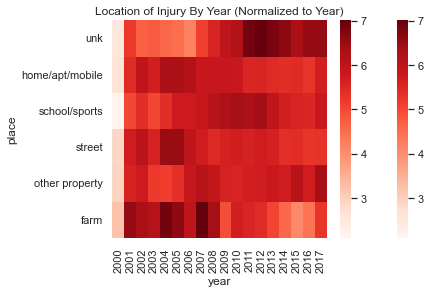

In [253]:
#Visualize
sns.heatmap(my_contingency_table2, cmap = "Reds")
ax_2 = sns.heatmap(my_contingency_table2, cmap = "Reds")
ax_2.set_title("Location of Injury By Year (Normalized to Year)")